In [1]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

In [2]:
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

In [3]:
def visualize(X, y, clf):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plot_decision_boundary(lambda x: clf.predict(x), X, y)
    plt.title("Logistic Regression")

In [4]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [5]:
def classify(X, y):
    clf = svm.SVC(C=1.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf') # rbf, linear
    clf.fit(X, y)
    return clf

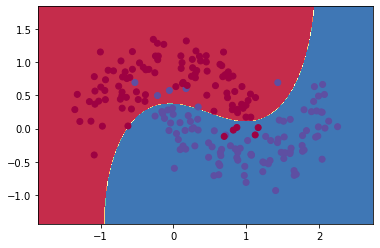

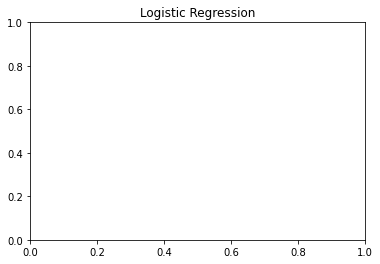

In [6]:
X, y = generate_data()
clf = classify(X, y)
visualize(X, y, clf)